In [1]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML
import requests

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

In [4]:
cap = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

while True:
    ret, frame = cap.read()

    if not ret: break

    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)

    cv2.imshow('frame', frame)
    if cv2.waitKey(10) == 27:  break

cv2.destroyAllWindows()

In [11]:
cap = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

fgbg = cv2.createBackgroundSubtractorMOG2(varThreshold=100)


while True:
    ret, frame = cap.read()
    if not ret: break
        
    fgmask = fgbg.apply(frame)        
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)        
    cv2.imshow('mask', fgmask)
    cv2.imshow('frame', frame)
        
    if cv2.waitKey(-1) == 27:  break

cv2.destroyAllWindows()

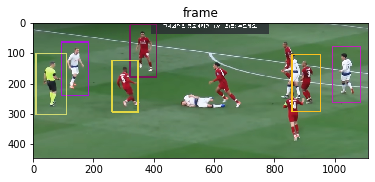

In [12]:
frame = cv2.imread('hogtest.png')
detected, _ = hog.detectMultiScale(frame)

for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
        
imshow('frame', frame)

In [14]:
def detectHuman(frame) :
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
    return detected    

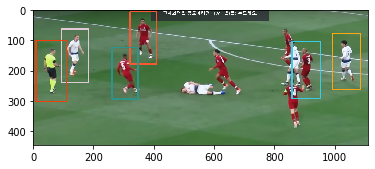

In [15]:
frame = cv2.imread('hogtest.png')
detectHuman(frame)
imshow("", frame)

In [56]:
%%writefile server.py
import cv2
import numpy as np
import io
import random

from flask import Flask, request, render_template, make_response, Response
app = Flask(__name__)

vc = cv2.VideoCapture('vtest.avi')

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

datas = []

def detectHuman(frame) :
    detected, _ = hog.detectMultiScale(frame)

    for (x, y, w, h) in detected:
        c = (random.randint(0, 255),
             random.randint(0, 255), 
             random.randint(0, 255))
        cv2.rectangle(frame, (x, y), (x + w, y + h), c, 3)
    return detected    

@app.route('/')
def index():
    return  render_template("human.html")

def gen():
    global vc
    global datas
    
    while True:
        read_return_code, frame = vc.read()
        
        if not read_return_code :
            vc = cv2.VideoCapture('vtest.avi')
            datas = []
            break;
        
        rect = detectHuman(frame)
        
        datas.append(len(rect))
        print(datas)
        
        encode_return_code, image_buffer = cv2.imencode('.jpg', frame)
        io_buf = io.BytesIO(image_buffer)
        yield (b'--frame\r\n'
               b'Content-Type: image/jpeg\r\n\r\n' + io_buf.read() + b'\r\n')


@app.route('/video_feed')
def video_feed():
    """Video streaming route. Put this in the src attribute of an img tag."""
    return Response(
        gen(),
        mimetype='multipart/x-mixed-replace; boundary=frame'
    )

@app.route('/view')
def view():
    global datas
    return str(datas)
    
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [48]:
def fun()  :
    yield 10
    yield 20
    yield 30  
 
a = fun()
print(next(a))
print(next(a))
print(next(a))
    
#for i in fun() :    print(i)    

10
20
30


In [49]:
def fun()  :
    while True :
        yield 10
        yield 20
        yield 30  
 
a = fun()
print(next(a))
print(next(a))
print(next(a))
    
#for i in fun() :    print(i)    

10
20
30


In [50]:
print(next(a))

10


In [51]:
print(next(a))

20


In [ ]:
def fun()  :
    file = fopen("")  # 5GB
    
    while True :
        yield 50M 생성
        yield 50M 생성
        yield 50M 생성
 
a = fun()
print(next(a))
print(next(a))
print(next(a))

# FAST

In [66]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(70)

keypoints = fast.detect(src)
print(len(keypoints))

365


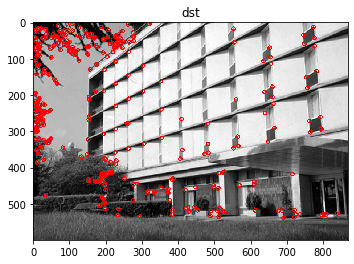

In [67]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)
imshow('dst', dst) 

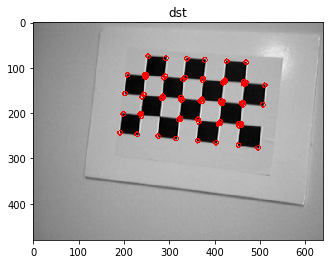

In [70]:
src = cv2.imread('chessboard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(70)

keypoints = fast.detect(src)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)
imshow('dst', dst) 


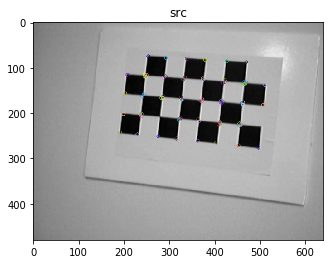

True

In [76]:
dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
imshow('src', dst) 

cv2.imwrite("out.png", dst)

# ORB

In [3]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints = orb.detect(src)

keypoints, desc = orb.compute(src, keypoints)

print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)

dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

len(keypoints): 500
desc.shape: (500, 32)


In [4]:
print(desc.shape)  # 256 / 8

(500, 32)


In [86]:
print(keypoints[0].pt[0], keypoints[0].pt[1])
print(src[int(keypoints[0].pt[1]), int(keypoints[0].pt[0])])
print(desc[0,:])

664.0 291.0
75
[ 17 205 111 254  28 134  79 244 196  64 222 198 113 231 176  97 124 226
  63 238 233 139  62 189 242 239 170 136  61 186 112 120]


In [81]:
print(desc[1,:])

[222  59 122 102 115  90  63 112  41 236 183 171 111  95 151  48  54 245
 221 227 220 147 164 238 114 205  41 179 103 183  15  87]


In [8]:
src1 = cv2.imread('book1.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('book1test.jpg', cv2.IMREAD_GRAYSCALE)

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)


dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
            cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
            cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)

cv2.waitKey()
cv2.destroyAllWindows()

    

(325.0, 90.0)
467
(253.8087158203125, 137.3553009033203)


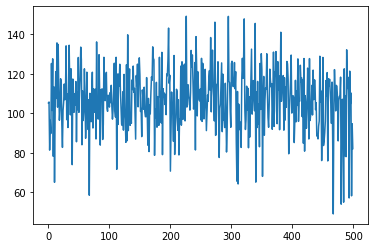

In [25]:
print(keypoints1[0].pt)

d = []
for i in range(len(keypoints2)) :
    d.append(np.mean((desc1[0] - desc2[i])**2))    
plt.plot(d)
print(np.argmin(h))
print(keypoints2[467].pt)

In [26]:
matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

In [27]:
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)



In [29]:
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [51]:
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:5]
dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
m  = good_matches[0]
print(m.queryIdx, m.trainIdx, m.distance) 

359 420 6.0


In [ ]:
for m in matches :
    print(m.queryIdx, m.trainIdx, m.distance) 

In [54]:
distance = [m.distance for m in matches]
print(np.mean(distance))

52.264


# 객체 인식

In [70]:
sift = cv2.ORB_create()
bf = cv2.BFMatcher()

images = ['book1.jpg', 'book2.jpg', 'book3.jpg', 'book4.jpg'] 
test = "book1test2.jpg"

img = cv2.imread(test)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kp, dest = sift.detectAndCompute(gray, None)
score = []
for i in range(0, len(images)) :
    img2 = cv2.imread(images[i])
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    kp2, dest2 = sift.detectAndCompute(gray2, None)
    matches = bf.match(dest,dest2)
    matches = sorted(matches, key = lambda x:x.distance)
    matches = matches[:50]
    distance = np.mean([x.distance for x in matches])
    score.append(distance)
print(score)

[192.8065235900879, 306.4928909301758, 302.97185485839844, 292.2234832763672]


(<matplotlib.axes._subplots.AxesSubplot at 0x19d932cb108>,
 <matplotlib.image.AxesImage at 0x19d93540fc8>)

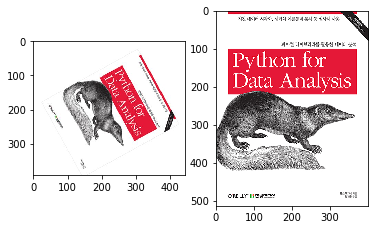

In [71]:
decision = np.argmin(score)
img2 = cv2.imread(images[decision])
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

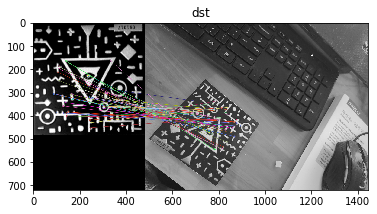

In [72]:
src1 = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('scene01.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50] 

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

imshow('dst', dst) 

In [73]:
pts1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)
pts2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2).astype(np.float32)

print(pts1.shape)

(50, 1, 2)


In [74]:
H, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)
print(H)

[[-6.32286424e-01  5.85445872e-01  3.03567203e+02]
 [-5.48470406e-01 -3.61298891e-01  7.03107040e+02]
 [-2.16475409e-04  4.24247210e-04  1.00000000e+00]]


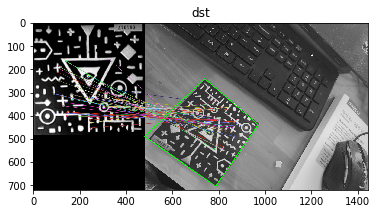

In [78]:
h, w = src1.shape

corners1 = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2).astype(np.float32)
corners2 = cv2.perspectiveTransform(corners1, H)


#cv2.polylines(src2, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)
corners2 = corners2 + np.float32([w, 0])
cv2.polylines(dst, [np.int32(corners2)], True, (0, 255, 0), 2, cv2.LINE_AA)

imshow('dst', dst)  